## Mag _versus_ Fofa challenge!

In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

PATH = "mag-fofa/"
sz=299
arch=resnext50
bs=28

Let's take a look in some examples.

In [0]:
#Fofa examples:
fofas = !ls {PATH}train/fofa | shuf | head
fofas

['IMG-20180131-WA0026.jpg',
 '520.jpeg',
 'IMG-20170726-WA0035.jpg',
 'IMG-20170713-WA0013.jpg',
 '20170529_135635.jpg',
 'IMG_20180125_194200.jpg',
 '197.jpeg',
 'IMG-20170427-WA0010.jpg',
 'IMG-20170617-WA0098.jpg',
 'IMG_20171223_150522_HDR.jpg']

In [0]:
#Mag examples:
mags = !ls {PATH}train/mag | shuf | head
mags

['IMG_20180505_115306.jpg',
 'IMG_20180416_074253.jpg',
 'IMG_20180318_092152.jpg',
 'IMG_20180519_164754.jpg',
 '455.jpeg',
 '20171106_084211.jpg',
 'IMG_20180410_063458_HHT.jpg',
 'IMG_20171223_140311.jpg',
 'IMG_20180312_141622.jpg',
 '484.jpeg']

In [0]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [0]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)

In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

100%|██████████| 5/5 [00:18<00:00,  3.77s/it]


In [0]:
learn.fit(1e-2, 1)
learn.precompute=False

epoch      trn_loss   val_loss   accuracy                  
    0      0.439646   0.192324   0.932836  



In [0]:
learn.fit(1e-2, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.134972   0.152276   0.955224  
    1      0.141244   0.139703   0.962687                  



[array([0.1397]), 0.9626865662745575]

In [0]:
learn.unfreeze()
lr=np.array([1e-4,1e-3,1e-2])

In [0]:
%time learn.fit(lr, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.211472   0.172806   0.947761  
    1      0.12851    0.137857   0.955224                  
    2      0.105636   0.11725    0.970149                   

CPU times: user 9min 9s, sys: 26.7 s, total: 9min 35s
Wall time: 5min 25s


[array([0.11725]), 0.9701492430558846]

In [0]:
learn.save('224_all_50')

In [0]:
learn.load('224_all_50')

In [0]:
log_preds,y = learn.TTA()
probabilities = np.mean(np.exp(log_preds),0)
accuracy_np(probabilities,y)

0.9701492537313433

## Analyzing results

In [0]:
preds = np.argmax(probabilities, axis=1)
probs = probabilities[:,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

In [0]:
# what is y?
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
# which classes do we have and what are their indices?
data.classes

['fofa', 'mag']

[[68  3]
 [ 1 62]]


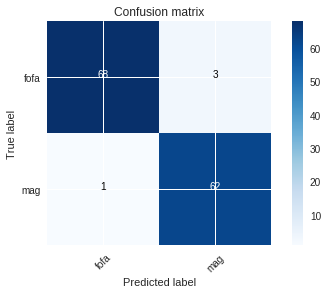

In [0]:
plot_confusion_matrix(cm, data.classes)

In [0]:
# Where did the algorithm got right?
data.val_y == preds

array([ True,  True,  True, False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = ["Fofa: %.2f " % probabilities[x][0] + "Mag: %.2f" % probabilities[x][1] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)


In [0]:
plot_val_with_title(rand_by_correct(True), "Corretos")

TypeError: not enough arguments for format string

Incorretos


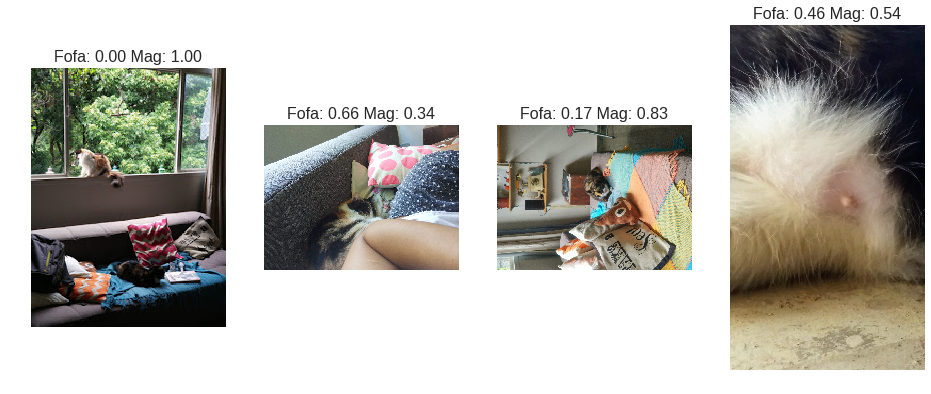

In [0]:
plot_val_with_title(rand_by_correct(False), "Incorretos")